# Project: TMDb movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### Dataset : TMDb movie
This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
<ul><li>Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.</li>
<li>There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
leave them as is.</li>
<li>The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time.</li>
</ul>

### Questions
<ol>
<strong>
<li>What is the number of movies per year for each genres?</li>
<li>Which genres are most popular from year to year?</li>
<li>Who are the top 10 directors?</li>
<li>What kinds of properties are associated with movies that have high revenues?</li>
</strong>
</ol>

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines.
df = pd.read_csv('tmdb-movies.csv')

In [3]:
#print out few lines
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


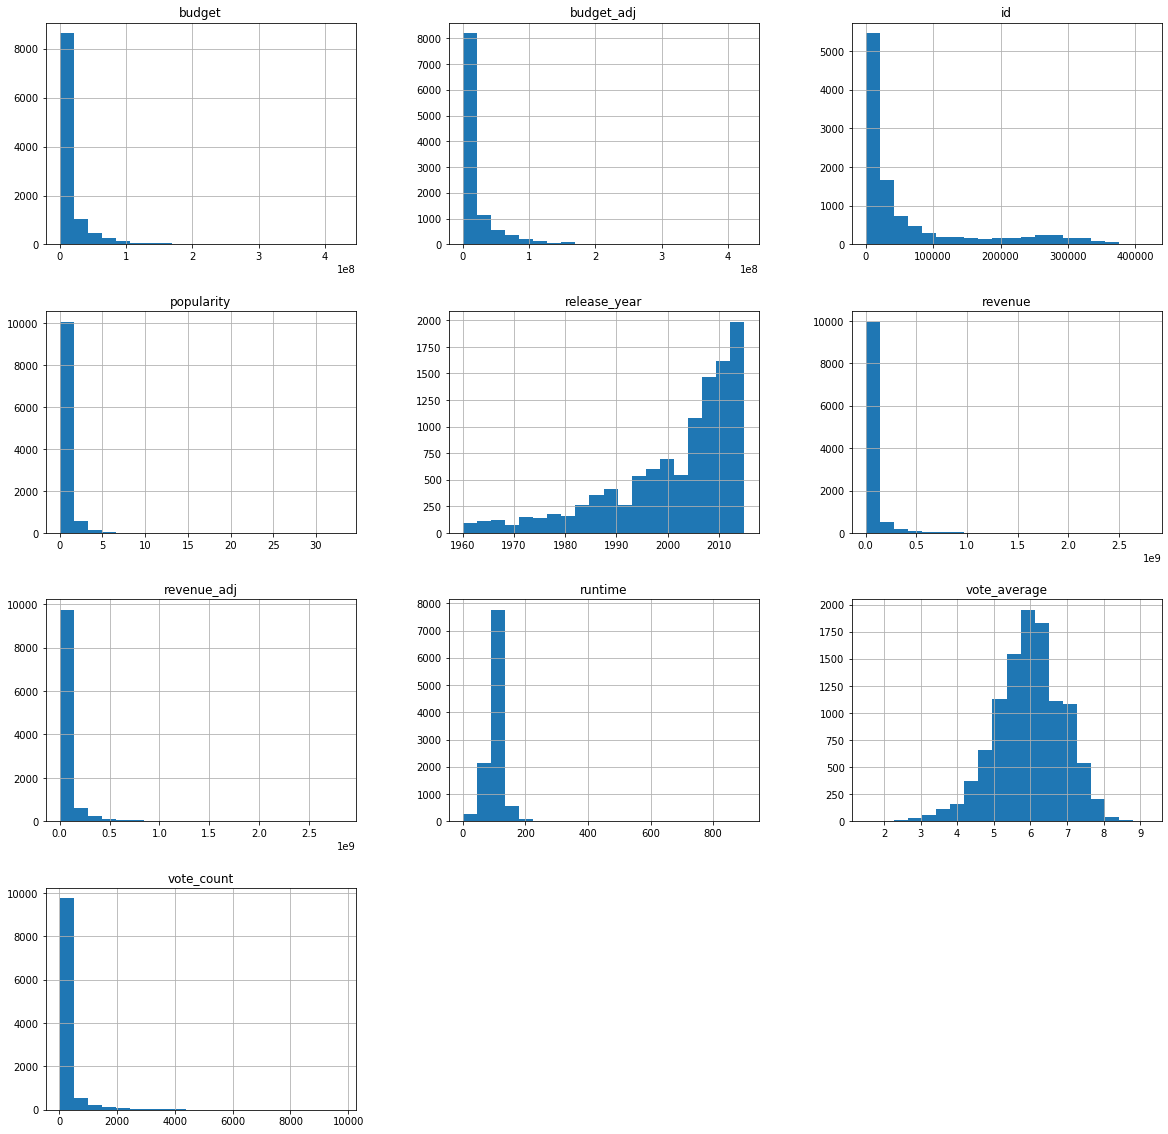

In [6]:
df.hist(figsize=(20,20),bins=20);

films release rate increases from year to another<br>
most moves have budget lower than 0.2*10^8 

#### From data describtion we can note that:
<ul>
    <li>50% or more of budget and revenuse fields are zeroes</li>
    <li>runtime column has some zero values too</li>
</ul>

#### From data info we can take these notes:
<ul>
    <li>some columns have missing data</li>
    <li>release date is in string formate, should be changed to datetime</li>
</ul>

#### We can drop some columns that are not useful at least for our questions.
These Columns are:
<ul>
    <li>id</li>
    <li>imdb_id</li>
    <li>homepage</li>
    <li>tagline</li>
    <li>overview</li>
    <li>keywords</li>
    <li>cast</li>
</ul>

now we check of duplicate

In [7]:
df.duplicated().sum()

1

Found only one duplication

### Data Cleaning
In this step we will:
<ol>
<li>drop unuseful columns</li>
<li>drop duplicates</li>
<li>change release date to datetime type</li>
<li>fill na with zero values</li>
</ol>

In [8]:
#1- drop unuseful columns
df.drop(['id','imdb_id','homepage','tagline','overview','keywords','cast'],axis = 1 ,inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [10]:
#2- drop duplicates
df.drop_duplicates(inplace = True)

In [11]:
#3- hange release date to datetime type
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head(1)

0   2015-06-09
Name: release_date, dtype: datetime64[ns]

In [12]:
#4- fill na with zeros

#number of na in each column
df.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [13]:
df.fillna(0,inplace = True)

In [14]:
#final check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
director                10865 non-null object
runtime                 10865 non-null int64
genres                  10865 non-null object
production_companies    10865 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 1.2+ MB


In [15]:
# number of revenue field and budget field with zero value
(df['revenue'] == 0).sum() , (df['budget'] == 0).sum()

(6016, 5696)

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1  What is the number of movies per year for each genres ?

First we need to preprocess genres column to map each string to boolean representation of available genres, in other words we will map genres column to 20 bool column ['Adventure', 'Science Fiction', ….. 'Foreign'].
Then, the resulted datafarme will be joined with release_year column and grouped by year so that we can find the sum of each genre in each year.

In [16]:
#map genres column to 20 bool column

#availabe genres in tmdb dataset
all_genres = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family', 'Animation',
         'War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' ,
         'History', 'Music', 'Horror', 'Documentary', 'Foreign']

#creat empty datafarme with {all_genres as] column names
genres_df = pd.DataFrame(columns=all_genres)

#map genres
for genre in all_genres:
    genres_df[genre] = df['genres'].apply(lambda x: genre in str(x))
    


In [17]:
genres_df.head(3)

,Adventure,Science Fiction,Fantasy,Crime,Western,Family,Animation,War,Mystery,Romance,TV Movie,Action,Thriller,Comedy,Drama,History,Music,Horror,Documentary,Foreign
0,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [18]:
#join genres_df with release_year column so that we can group result by year
genres_releaseYear_df = genres_df.join(df['release_year'])
genres_releaseYear_df.head(1)

,Adventure,Science Fiction,Fantasy,Crime,Western,Family,Animation,War,Mystery,Romance,...,Action,Thriller,Comedy,Drama,History,Music,Horror,Documentary,Foreign,release_year
0,True,True,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,2015


In [19]:
#group genres_releaseYear_df by release_year
genres_groupedbyYear_df=genres_releaseYear_df.groupby(['release_year']).sum()

Plotting result

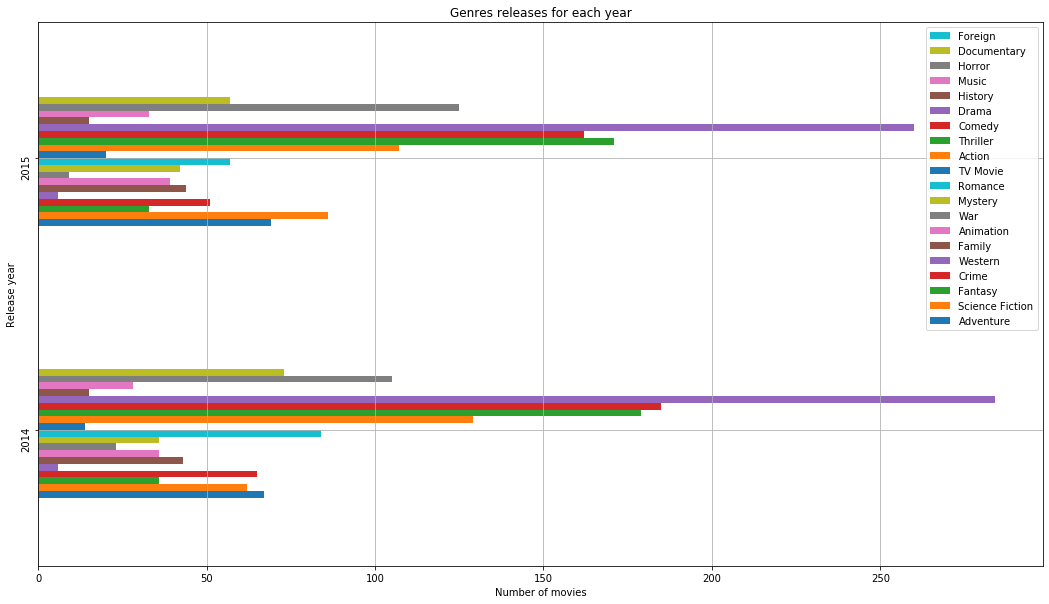

In [20]:
#number of years to be plotted
last_x_years = 2
#which genres to be ploted
chosen_genres = all_genres # or ['Action','Adventure'] for example
genres_groupedbyYear_df[chosen_genres][-last_x_years:].plot(kind="barh",rot=90,grid=True,
                                                                           figsize=(18,10),legend= 'reverse');
plt.title('Genres releases for each year');
plt.xlabel("Number of movies");
plt.ylabel("Release year");

Drama movies have the most release rate<br>
Foreign moves are the least

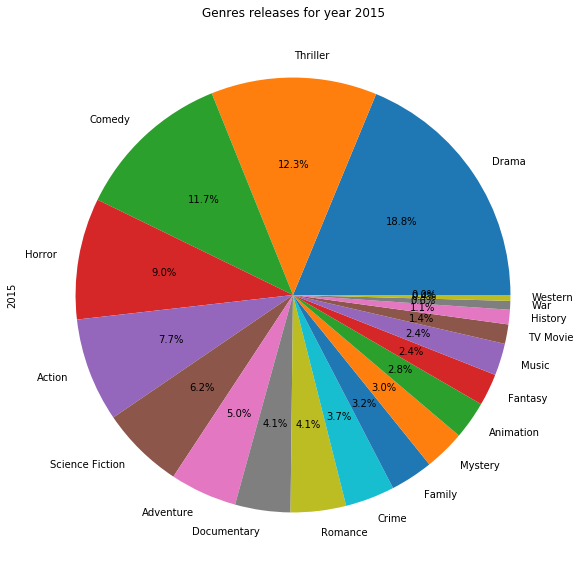

In [21]:
#genres of one year(2015) in pie chart
year = 2015
genres_groupedbyYear_df[chosen_genres].loc[year].sort_values(ascending =False).plot(kind="pie"
                                                                                    ,figsize=(10,10),autopct='%1.1f%%');
plt.title('Genres releases for year ' + str(year));


Drama,thriller,comedy and horror represents more than 50% of moves released in 2015


### Question 2 Which genres are most popular from year to year?

<pre>
To answer this question we will:
1- use a copy of genres_df from the previous question
2- multiply it with popularity column
3- join the result with year column
4- then Group them by years
</pre>

In [22]:
#make a copy of genres_df 
genres_popularity_df = genres_df.copy()
genres_popularity_df.head(1)

,Adventure,Science Fiction,Fantasy,Crime,Western,Family,Animation,War,Mystery,Romance,TV Movie,Action,Thriller,Comedy,Drama,History,Music,Horror,Documentary,Foreign
0,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False


In [23]:
#multiply with Popularity
genres_popularity_df[all_genres] = genres_popularity_df[all_genres].multiply(df["popularity"],
                                                                             axis="index")
genres_popularity_df.head(1)

,Adventure,Science Fiction,Fantasy,Crime,Western,Family,Animation,War,Mystery,Romance,TV Movie,Action,Thriller,Comedy,Drama,History,Music,Horror,Documentary,Foreign
0,32.985763,32.985763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.985763,32.985763,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#join genres_popularity_df with release_year column so that we can group result by year
genres_popularity_df = genres_popularity_df.join(df['release_year'])

In [25]:
genres_popularity_df.head(1)

,Adventure,Science Fiction,Fantasy,Crime,Western,Family,Animation,War,Mystery,Romance,...,Action,Thriller,Comedy,Drama,History,Music,Horror,Documentary,Foreign,release_year
0,32.985763,32.985763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.985763,32.985763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015


In [26]:
genresPopularity_groupedbyYear_df = genres_popularity_df.groupby('release_year').sum()
genresPopularity_groupedbyYear_df.tail()

,Adventure,Science Fiction,Fantasy,Crime,Western,Family,Animation,War,Mystery,Romance,TV Movie,Action,Thriller,Comedy,Drama,History,Music,Horror,Documentary,Foreign
release_year,,,,,,,,,,,,,,,,,,,,
2011,70.028286,54.259455,46.534893,42.801786,3.527401,55.893736,44.387170,4.731528,32.673002,50.677041,4.112818,121.681073,116.041838,115.304366,128.088313,2.473334,6.768360,40.690885,9.250019,1.819813
2012,73.073879,50.663266,46.166250,46.632713,6.931111,31.257886,32.214146,6.767092,16.357765,51.936521,2.872503,111.986677,108.295298,104.231064,140.376994,5.604431,9.453821,45.168912,7.590372,0.597536
2013,84.475720,75.875393,39.743062,65.017269,1.995766,39.526268,36.320297,3.770256,22.426785,39.702135,2.677460,122.089178,128.550095,105.688203,166.999176,11.042901,10.809351,50.174675,10.321471,0.000000
2014,162.845275,142.255997,65.856645,57.459754,4.043682,47.765725,40.464223,34.065885,36.493987,52.850344,4.144533,216.979690,186.504459,160.332602,246.362717,16.144810,18.259123,50.809329,11.046404,0.000000
2015,226.581261,193.121886,57.427532,87.823617,19.072777,60.237690,44.705638,11.560600,51.023584,54.085299,5.211474,240.901421,239.720907,152.041317,243.848091,15.118574,20.958333,59.583763,10.857550,0.000000


In [27]:
#get the id of max value for each year
genresPopularity_groupedbyYear_df.idxmax(axis=1)

release_year
1960        Drama
1961        Drama
1962        Drama
1963     Thriller
1964       Comedy
1965        Drama
1966        Drama
1967        Drama
1968        Drama
1969        Drama
1970        Drama
1971        Drama
1972        Drama
1973        Drama
1974        Drama
1975        Drama
1976        Drama
1977    Adventure
1978        Drama
1979        Drama
1980       Action
1981    Adventure
1982        Drama
1983       Action
1984       Action
1985       Comedy
1986        Drama
1987       Comedy
1988       Comedy
1989       Comedy
1990        Drama
1991       Comedy
1992       Comedy
1993        Drama
1994        Drama
1995        Drama
1996        Drama
1997     Thriller
1998        Drama
1999        Drama
2000       Comedy
2001        Drama
2002        Drama
2003       Action
2004       Comedy
2005        Drama
2006        Drama
2007        Drama
2008        Drama
2009        Drama
2010        Drama
2011        Drama
2012        Drama
2013        Drama
2014        Dra

It looks like Drama is the dominant genre of all years

### Question 3 Who are the top 10 directors?

We can decide who is the best director based on 2 factors , who directed more popular films and gain higher revenue.

let's start with films popularity<br>
First drop records that has 0 value in director column<br>
second group data by director names<br>
then sum films popularity for each director

In [28]:
#number of rows with director = 0
(df.director == 0).sum()

44

In [29]:
#filter zero values and save result in new datafram (director_popularity_df)
director_popularity_df = df[df.director != 0][['director','popularity']]

In [30]:
#check that zero values are not inclueded
(director_popularity_df.director == 0).sum()

0

In [31]:
#group data by director name
director_grouped_df = director_popularity_df.groupby('director').sum()
director_grouped_df.head(3)

,popularity
director,
FrÃ©dÃ©ric Jardin,0.434506
A. Todd Smith,1.876037
A.R. Murugadoss,0.215030


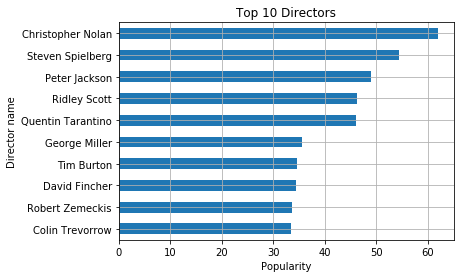

In [32]:
director_grouped_df['popularity'].sort_values()[-10:].plot.barh(grid=True);
plt.title('Top 10 Directors');
plt.xlabel("Popularity");
plt.ylabel("Director name");

Christopher is the top director according to films popularity

<strong>
Next: Compare according to revenue (revenue_adj)<br>
</strong>

First drop records that has 0 value in director column and revenue_adj column<br>
second groub data by director names<br>
then sum films revenue_adj for each director

In [33]:
#number of rows with revenue_adj = 0
(df.revenue_adj == 0).sum()

6016

In [34]:
#filter zeor values ans save result in new datafram (director_revenueAdj_df)
director_revenueAdj_df = df[(df.revenue_adj != 0) & (df.director != 0)][['director','revenue_adj']]

In [35]:
#check that zero values not inclueded
(director_revenueAdj_df.revenue_adj == 0).sum(),(director_revenueAdj_df.director == 0).sum()

(0, 0)

In [36]:
director_revenueAdj_df = director_revenueAdj_df.groupby('director').sum()
director_revenueAdj_df.head(3)

,revenue_adj
director,
FrÃ©dÃ©ric Jardin,3.255239e+03
A.R. Murugadoss,7.697178e+07
Aaron Blaise|Robert Walker,2.963382e+02


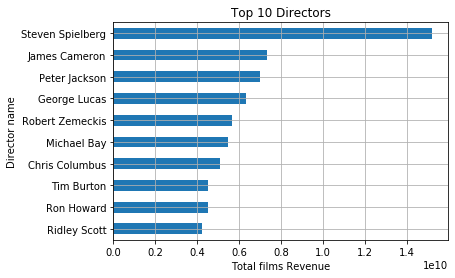

In [37]:
director_revenueAdj_df['revenue_adj'].sort_values()[-10:].plot.barh(grid=True);
plt.title('Top 10 Directors');
plt.xlabel("Total films Revenue");
plt.ylabel("Director name");

Steven Spielberg is the top director according to films revenus

### Question 4 What kinds of properties are associated with movies that have high revenues?

we will find how high budget, popularity, run time, genre and the month films released in affects films revenues

In [38]:
#first we filter revenues and budget with zero values
revenues_df = df[(df.revenue_adj != 0) & (df.budget_adj != 0)]

In [39]:
(revenues_df.revenue_adj == 0).sum() , (revenues_df.budget_adj == 0).sum()

(0, 0)

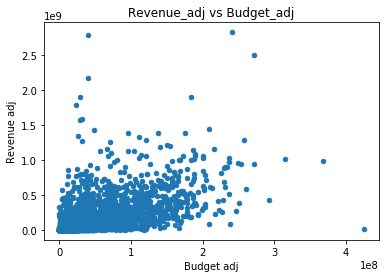

In [40]:
#Budget
revenues_df.plot(x = 'budget_adj' , y = 'revenue_adj' , kind = 'scatter');
plt.title('Revenue_adj vs Budget_adj');
plt.xlabel('Budget adj');
plt.ylabel("Revenue adj");

from figures we can say that there is a positive correlation between Revenue and Budget

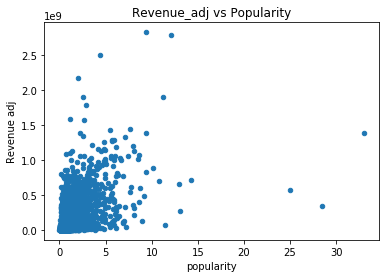

In [41]:
#Popularity
revenues_df.plot(x = 'popularity' , y = 'revenue_adj' , kind = 'scatter');
plt.title('Revenue_adj vs Popularity');
plt.xlabel('popularity');
plt.ylabel("Revenue adj");

from figures we can say that there is a positive correlation between Revenue and Popularity

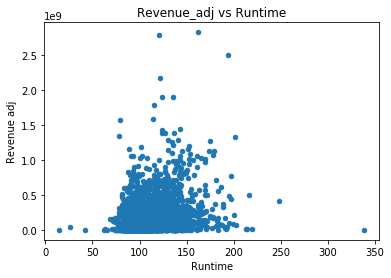

In [42]:
#Runtime
revenues_df.plot(x = 'runtime' , y = 'revenue_adj' , kind = 'scatter');
plt.title('Revenue_adj vs Runtime');
plt.xlabel('Runtime');
plt.ylabel("Revenue adj");

from figures we can say that there is no correlation between Revenue and Runtime
and films with runtime less than 60 min or higher than 210 min tends to have lower revenue

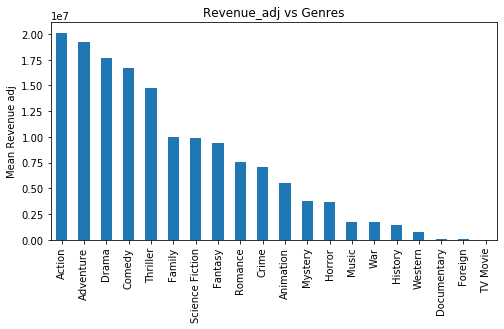

In [43]:
#Genres
genres_df.multiply(df.revenue_adj,axis = 0).mean().sort_values(ascending = False).plot.bar(figsize=(8,4));
plt.title('Revenue_adj vs Genres');
plt.ylabel("Mean Revenue adj");

Action,Adventure,Drama,comedy and thriller moves have high reveune comparing to other genres

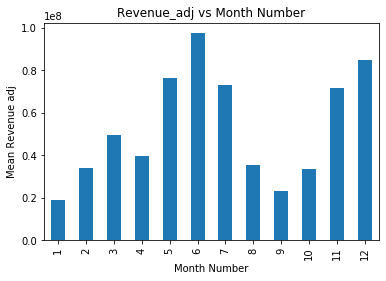

In [44]:
#the month films released in
df.groupby(df['release_date'].dt.month)['revenue_adj'].mean().plot.bar();
plt.title('Revenue_adj vs Month Number');
plt.xlabel('Month Number')
plt.ylabel("Mean Revenue adj");

filmes with high revenue released in month 6 which is june and month  12 which is december

<a id='conclusions'></a>
## Conclusions

<pre>
1- top genres differ from year to year but to dominant genres are drama,action,advanture and comedy
2- Darma genre is the most popular genre
3- Christopher is the top director according to films popularity
4- Steven Spielberg is the top director according to films revenus
5- Films with high revenue have the following characteristics:
    1- high budget
    2- popular among people
    3- tends to be Action,Adventure,Drama,comedy or thriller movies
    4- released in the beginning of summer or winter
</pre>

#### Limitations
<pre>
Releasing films with these characteristics doesn't guarantee that they will be successful movies but it gives people high expectations from these movies.Extraordinary things may happen (like corona virus for example) and leed to lowering the revenue of movie.
</pre>